In [1]:
import pandas as pd

In [2]:
import pickle
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
pickle_file = open("datasets\ground_truth_wdd_angles.pickle", "rb")

In [5]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [6]:
data = []
data.append(pickle.load(pickle_file))

### Total number of sequences = 1009

In [7]:
count = 0
for ids in data[0]:
    count += 1
count

1009

In [8]:
data[0][10902373867864485654]

('activating',
 1.88699,
 WindowsPath('/mnt/curta/storage/beesbook/wdd/wdd_output_2021/cam1/2021/10/2/10/13/13/waggle.json'))

In [9]:
data[0][10902373867864485654][0]

'activating'

### Path conversion

In [10]:
data[0][10902373867864485654][2]

WindowsPath('/mnt/curta/storage/beesbook/wdd/wdd_output_2021/cam1/2021/10/2/10/13/13/waggle.json')

In [11]:
str(data[0][10902373867864485654][2]).split("\\")

['',
 'mnt',
 'curta',
 'storage',
 'beesbook',
 'wdd',
 'wdd_output_2021',
 'cam1',
 '2021',
 '10',
 '2',
 '10',
 '13',
 '13',
 'waggle.json']

In [12]:
os.path.join(*str(data[0][10902373867864485654][2]).split("\\")[6:-1])

'wdd_output_2021\\cam1\\2021\\10\\2\\10\\13\\13'

In [13]:
path = str(data[0][14315729783549168726][2]).split("\\")[6:-1]
path

['wdd_output_2021', 'cam0', '2021', '10', '3', '11', '6', '2']

In [14]:
data_folder = os.path.join(*path)
folder_path = os.path.join("datasets\wdd_ground_truth", data_folder)
folder_path = os.path.join(folder_path, "images.zip")
folder_path

'datasets\\wdd_ground_truth\\wdd_output_2021\\cam0\\2021\\10\\3\\11\\6\\2\\images.zip'

In [15]:
image_data_list = []
sequence = list(range(1009))
sec_data = {}
from zipfile import ZipFile
import cv2
with ZipFile(folder_path, "r") as zip_ref:
    images = zip_ref.namelist()
    for image in images:
        ext = os.path.splitext(image)[-1]      #.png
        if ext == ".png" or ext == ".jpg":
            img_data = zip_ref.read(image)
            img = cv2.imdecode(np.frombuffer(img_data, np.uint8), 0)
            #print(img.shape)
            #new_image = cv2.resize(img, (60, 60))
            #cv2.imwrite(image, new_image)
            img = cv2.resize(img, (60, 60))
            image_data_list.append(img)
    sec_data[0] = np.array(image_data_list)

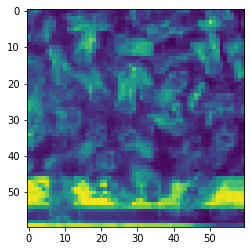

In [16]:
import matplotlib.pyplot as plt
plt.imshow(np.array(image_data_list)[0])

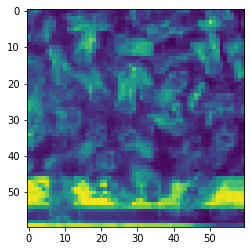

In [17]:
plt.imshow(np.array(image_data_list)[0])

In [18]:
video_0 = np.array(image_data_list)       # class = activating

In [19]:
video_0.shape

(136, 60, 60)

In [20]:
179 - len(image_data_list)

43

In [21]:
np.zeros((43, 220, 220)).shape

(43, 220, 220)

In [22]:
images_after_padding = np.append(np.array(image_data_list), np.zeros((43, 60, 60)), axis = 0)

In [23]:
images_after_padding.shape

(179, 60, 60)

In [24]:
print("Bytes: ", images_after_padding.size * images_after_padding.itemsize)
print("Mega Bytes: ", images_after_padding.size * images_after_padding.itemsize / (np.power(1024, 2)))

Bytes:  5155200
Mega Bytes:  4.9163818359375


In [46]:
full_length_video = np.zeros((179, 220, 220))
print("Bytes: ", full_length_video.size * full_length_video.itemsize)
print("Mega Bytes: ", full_length_video.size * full_length_video.itemsize / (np.power(1024, 2)))

Bytes:  69308800
Mega Bytes:  66.0980224609375


In [26]:
images_after_padding[136][0][0]

0.0

In [27]:
np.array(image_data_list)[0][0][0]

65

In [28]:
num_array = np.array([], ndmin = 5)
num_array.ndim

5

In [29]:
num_array = np.append(num_array, 0)
num_array

array([0.])

In [30]:
np.array(image_data_list)[0][0][0:1][0:1][0:1]

array([65], dtype=uint8)

In [31]:
np.array(image_data_list).shape

(136, 60, 60)

In [32]:
image_data_list[0][0, 0]

65

### Finding the maximum frames length from all videos

In [33]:
max_frame_len = 0
try:
    for ids in data[0]:
        image_data_list = []
        #print(sequence)
        path = str(data[0][ids][2]).split("\\")[6:-1]
        label = data[0][ids][0]
        data_folder = os.path.join(*path)
        folder_path = os.path.join("datasets\wdd_ground_truth", data_folder)
        folder_path = os.path.join(folder_path, "images.zip")
        #image_data_list.append(sequence)
        
        try:
            with ZipFile(folder_path, "r") as zip_ref:
                images = zip_ref.namelist()
                if len(images) > max_frame_len:
                    max_frame_len = len(images)
        except:
            print("Error in Retrieving Image data!")
except ValueError:
    print("Error found in retrieving files path or setting folder path!")

In [34]:
max_frame_len

179

In [37]:
def load_image_data(data):
    video_data = np.array([])
    video_label = []
    IMG_SIZE = 60
    seq = 0
    try:
        for ids in data[0]:
            image_data_list = []
            #print(sequence)
            path = str(data[0][ids][2]).split("\\")[6:-1]
            label = data[0][ids][0]
            data_folder = os.path.join(*path)
            folder_path = os.path.join("datasets\wdd_ground_truth", data_folder)
            folder_path = os.path.join(folder_path, "images.zip")
            #image_data_list.append(sequence)
            try:
                with ZipFile(folder_path, "r") as zip_ref:
                    images = zip_ref.namelist()
                    for image in images:
                        ext = os.path.splitext(image)[-1]      #.png
                        if ext == ".png" or ext == ".jpg":
                            img_data = zip_ref.read(image)
                            img = cv2.imdecode(np.frombuffer(img_data, np.uint8), 0)   # '1' for RGB, '0' for grayscale
                            img = cv2.resize(img, (60, 60))
                            #print(img.shape)
                            image_data_list.append(img)
            except:
                print("Error in Retrieving Image data!")
            frame_len_diff = max_frame_len - len(image_data_list)
            image_data_after_padding = np.append(np.array(image_data_list), np.zeros((frame_len_diff, IMG_SIZE, IMG_SIZE)),
                                                 axis = 0)
            if video_data.size == 0:
                video_data = image_data_after_padding.reshape(1, max_frame_len, IMG_SIZE, IMG_SIZE).copy()
                video_label.append(label)
                continue
            #video_data = np.append(video_data[seq], image_data_after_padding, axis = 0)
            #video_data = np.append(video_data, image_data_after_padding)
            video_data = np.append(video_data, image_data_after_padding.reshape(1, max_frame_len, IMG_SIZE, IMG_SIZE), axis = 0)
            video_label.append(label)
            image_data_after_padding = np.array([])
            print(seq)
            seq += 1
    except ValueError:
        print("Error found in retrieving files path or setting folder path!")
    return video_data, video_label

In [38]:
videos_data, videos_label = load_image_data(data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Encoding the target class feature

In [39]:
len(videos_label)

1009

In [59]:
videos_label[:10]

['activating',
 'other',
 'other',
 'trembling',
 'activating',
 'waggle',
 'trembling',
 'other',
 'other',
 'activating']

In [40]:
from sklearn.preprocessing import LabelEncoder 
ly = LabelEncoder()
y = ly.fit_transform(videos_label)

In [60]:
y[:10]

array([0, 1, 1, 2, 0, 4, 2, 1, 1, 0], dtype=int64)

In [64]:
y[y == 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
videos_data.shape

(1009, 179, 60, 60)

In [45]:
videos_data[0][0].shape

(60, 60)

In [47]:
videos_data[1].shape

(179, 60, 60)

In [58]:
count = 0
for image in videos_data[1]:
    cv2.imwrite(f"img{count}.PNG", image)
    count += 1

In [77]:
folder = "datasets\ "
folder

'datasets\\ '

In [79]:
os.path.join("datasets", "new")

'datasets\\new'

In [68]:
print("\\")

\


In [81]:
folder = "datasets"
pickle_out = open(os.path.join(folder, "X.pickle"), "wb")
pickle.dump(videos_data, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(folder, "Y.pickle"),"wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
import pandas as pd
pd.DataFrame(sequence_of_images[0])

In [ ]:
np.array(image_data_list).shape

In [ ]:
new_list = []
new_list.append(0)
new_list.append(1)
new_list.append(2)
new_list.append(3)
new_list.append(4)
new_list

In [ ]:
new_list

In [ ]:
new_list[0] = [1, 2, 3, 4]

In [ ]:
new_list.append(8)
new_list

In [ ]:
w = np.array(new_list)
w

In [ ]:
w.shape

In [ ]:
w[w==3]

In [ ]:
w = w.astype(int)
w

In [ ]:
w_list = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
w_list

In [ ]:
np.array(w_list).shape

In [ ]:
w = list(range(1009))
w[0]

In [110]:
vids = np.zeros((179, 10, 10, 10))
dt  = np.array([])

In [111]:
dt = np.append(dt, vids)
dt.shape

(179000,)